In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [2]:
#stemming menghilangkan suffix dan prefix pada token/kata (reduce inflected)
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
# get indonesian stopword
list_stopwords = stopwords.words('indonesian') + list(STOPWORDS)
new_stopwords = ["ram", "gb", "nb", "original", "murah", "new", "x", "fi","a", "custom", "cm", "mm", "cetak", "tag", "pcs", "gr", "ml", "gram", "kg", "isi", "instan", "kemas", "sachet", "b", "w", "meter"]
list_stopwords.extend(new_stopwords)
custom_stopwords = set(list_stopwords)
#print(custom_stopwords)

In [3]:
def filter_word(freq, wcoll, exception=["oppo", "vivan", "mio"]):
    print("freq :",freq)
    
    newcoll = {}
    for w in wcoll.keys():
        print("w not in exception :", w.lower() in exception, ", w: ", w, ", wcol_freq: ", wcoll[w])
        if wcoll[w] >= freq or w.lower() in exception:
            newcoll[w] = wcoll[w]
            
    print("newcoll :", newcoll)
    return newcoll

In [4]:
def get_graph_plot(word_dict, filename):
    df_freq_tokens = pd.DataFrame.from_dict(word_dict, orient="index")
    df_freq_tokens.columns = ['Frequency']
    df_freq_tokens.index.name = 'Key'
    print(df_freq_tokens.sort_values(by="Frequency",ascending=False).head(20))
    file = "img/"+filename+"_bar.png"
    df_freq_tokens.plot(kind='bar').get_figure().savefig(file)

In [5]:
def generate_trend(csv_path, min_freq=10, watch_words=["vario", "beat", "mio"]):
    dataset = pd.read_csv(csv_path)
    print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
    sentence_list = []
    word_collection = {}
    file = csv_path.split(".")[0]
    print('Start generating '+file+'....')
    for index, row in dataset.iterrows():
        sentence_list.append(str(row['nama']))
    # convert to array
    for word in sentence_list:
        wlist = extract_word(word, custom_stopwords)
        append_word(word_collection, wlist)
    new_collection = filter_word(min_freq, word_collection)
    print('selesai...')
    create_wordcloud_dict(word_collection, max=150, filename=file)
    get_graph_plot(word_collection, file)
    get_graph_plot(new_collection, file)
    

In [6]:
#process name with nlp approach
#ref: https://yunusmuhammad007.medium.com/basic-text-preprocessing-menggunakan-nltk-86ba3e65a1dc
def tokenize_word(word):
    # 1. case folding
    tword = word.lower()
    # 2. tokenizing: pemecahan perkata
    # a. remove number
    tword = re.sub(r"\d+", "", tword)
    # b. remove punctuation / tanda baca
    tword = tword.translate(str.maketrans("","",string.punctuation))
    # c. remove whitespace leding & trailing
    tword = tword.strip()
    # d. remove multiple whitespace into single whitespace
    tword = re.sub('\s+', ' ', tword)
    #     print(tword)
    
    tokens = nltk.tokenize.word_tokenize(tword)
    #     print(tokens)
    return tokens

In [7]:
def remove_stopword(freq_tokens, list_stopwords):
    tokens_without_stopword = [word for word in freq_tokens if not word in list_stopwords]
    return tokens_without_stopword

In [8]:
def stem_word(list_tokens):
    return [stemmer.stem(token) for token in list_tokens]

In [9]:
def extract_word(word, stopwords):
    #1. tokenize word
    tword = tokenize_word(word)
    #2. filtering (stopword removal)
    tokens_without_stopword = remove_stopword(tword, stopwords)
    #3. stemming
    output=stem_word(tokens_without_stopword)
    return output
    

In [10]:
def append_word(wcoll, wlist):
    for word in wlist:
        if wcoll.get(word) is None:
            wcoll[word] = 1
        else:
            wcoll[word] += 1

In [11]:
def concat_text(full_text, wlist):
    text = " ".join(word for word in wlist)
    full_text += " "+text

In [12]:
def create_wordcloud_plain(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
def create_wordcloud_dict(w_dict, max=100, filename="shoope"):
    stop_words = ["x, fi"] + list(STOPWORDS)
    #print("stopwords: ",custom_stopwords)
    wordcloud = WordCloud(stopwords=custom_stopwords,max_font_size=50, max_words=max, background_color="white")
    wordcloud.generate_from_frequencies(frequencies=w_dict)
    file="img/"+filename+"_wordcloud.png"
    print("file wordcloud: ", file)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(filename+" trend wordcloud")
    plt.show()
    wordcloud.to_file(file)

In [13]:
#watch_words=["yamaha", "beat", "vario", "mio"]
#generate_trend("shopee-motor.csv", min_freq=40, watch_words=watch_words)

In [14]:
#generate_trend("shopee-atk.csv", min_freq=40)

In [15]:
#generate_trend("shopee-makanan.csv", min_freq=40)

In [16]:
#generate_trend("shopee-elektronik.csv", min_freq=40)

In [17]:
#generate_trend("shopee-komputer.csv", min_freq=40)

In [18]:
#generate_trend("shopee-motor-aksesoris.csv", min_freq=40)

Ukuran dataset: 20 baris dan 7 kolom

Start generating tokped_gadget....
freq : 0
w not in exception : False , w:  nan , wcol_freq:  20
newcoll : {'nan': 20}
selesai...
file wordcloud:  img/tokped_gadget_wordcloud.png


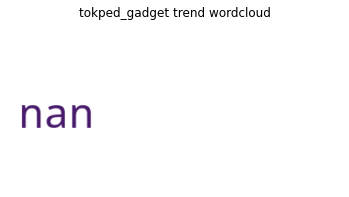

     Frequency
Key           
nan         20
     Frequency
Key           
nan         20


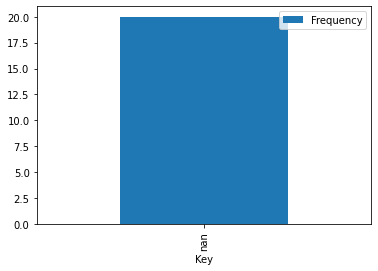

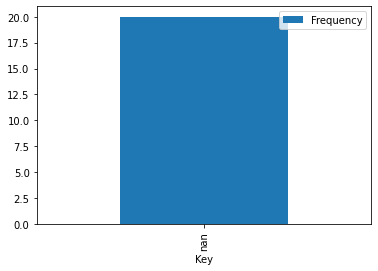

In [22]:
watch_words=["oppo", "vivan", "yunteng", "xiaomi"]
generate_trend("tokped_gadget.csv", min_freq=0, watch_words=watch_words)

Ukuran dataset: 60 baris dan 9 kolom

Start generating shopee_atk....
freq : 2
w not in exception : False , w:  yellow , wcol_freq:  1
w not in exception : False , w:  board , wcol_freq:  3
w not in exception : False , w:  bot , wcol_freq:  1
w not in exception : False , w:  kuning , wcol_freq:  1
w not in exception : False , w:  ukur , wcol_freq:  4
w not in exception : False , w:  deli , wcol_freq:  5
w not in exception : False , w:  color , wcol_freq:  1
w not in exception : False , w:  gel , wcol_freq:  6
w not in exception : False , w:  pen , wcol_freq:  3
w not in exception : False , w:  pulpen , wcol_freq:  4
w not in exception : False , w:  warna , wcol_freq:  6
w not in exception : False , w:  cerah , wcol_freq:  1
w not in exception : False , w:  needle , wcol_freq:  1
w not in exception : False , w:  tip , wcol_freq:  2
w not in exception : False , w:  tulis , wcol_freq:  5
w not in exception : False , w:  m , wcol_freq:  1
w not in exception : False , w:  apcs , wcol_freq: 

file wordcloud:  img/shopee_atk_wordcloud.png


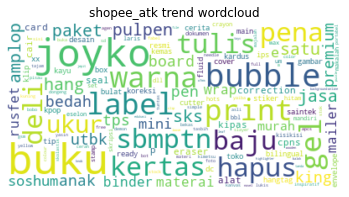

        Frequency
Key              
buku           13
joyko          11
bubble          7
gel             6
print           6
warna           6
label           6
kertas          5
hapus           5
deli            5
baju            5
pena            5
tulis           5
sbmptn          5
sks             4
                4
jasa            4
paket           4
amplop          4
hang            4
        Frequency
Key              
buku           13
joyko          11
bubble          7
gel             6
print           6
warna           6
label           6
pena            5
kertas          5
sbmptn          5
hapus           5
baju            5
deli            5
tulis           5
satu            4
                4
sks             4
jasa            4
amplop          4
ukur            4


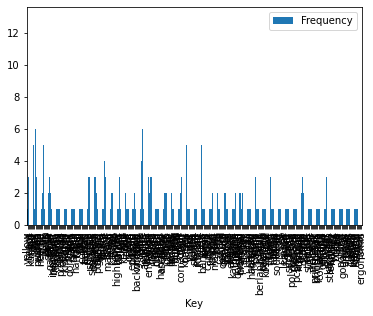

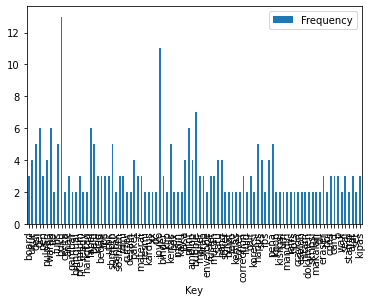

In [23]:
# seharusnya setiap judul itu dimasukkan ke kategori
watch_words=["oppo", "vivan", "yunteng", "mio"]
generate_trend("shopee_atk.csv", min_freq=2, watch_words=watch_words)

Ukuran dataset: 60 baris dan 9 kolom

Start generating shopee_gadget....
freq : 2
w not in exception : False , w:  kode , wcol_freq:  2
w not in exception : False , w:  cartoon , wcol_freq:  4
w not in exception : False , w:  griptok , wcol_freq:  5
w not in exception : False , w:  d , wcol_freq:  10
w not in exception : False , w:  phone , wcol_freq:  13
w not in exception : False , w:  holder , wcol_freq:  9
w not in exception : False , w:  pvc , wcol_freq:  3
w not in exception : False , w:  stand , wcol_freq:  11
w not in exception : False , w:  hp , wcol_freq:  18
w not in exception : False , w:  grip , wcol_freq:  4
w not in exception : False , w:  kpop , wcol_freq:  1
w not in exception : False , w:  korea , wcol_freq:  2
w not in exception : False , w:  kartu , wcol_freq:  7
w not in exception : False , w:  perdana , wcol_freq:  4
w not in exception : False , w:  axis , wcol_freq:  7
w not in exception : False , w:  reguler , wcol_freq:  1
w not in exception : False , w:  pulsa

file wordcloud:  img/shopee_gadget_wordcloud.png


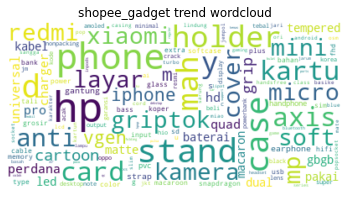

        Frequency
Key              
hp             18
phone          13
stand          11
case           10
d              10
mah             9
holder          9
y               8
card            7
kartu           7
axis            7
anti            6
micro           5
kamera          5
redmi           5
m               5
cover           5
iphone          5
mp              5
mini            5
        Frequency
Key              
hp             18
phone          13
stand          11
case           10
d              10
mah             9
holder          9
y               8
card            7
kartu           7
axis            7
anti            6
kamera          5
layar           5
micro           5
cover           5
soft            5
m               5
mp              5
mini            5


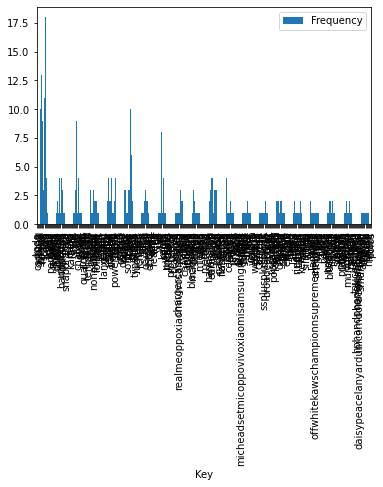

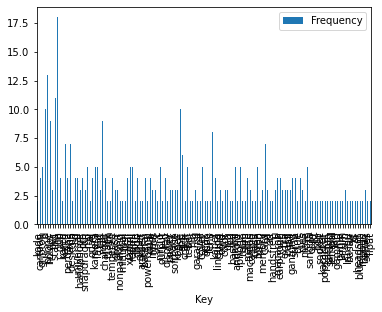

In [24]:
# seharusnya setiap judul itu dimasukkan ke kategori
watch_words=["oppo", "vivan", "yunteng", "mio"]
generate_trend("shopee_gadget.csv", min_freq=2, watch_words=watch_words)

Ukuran dataset: 60 baris dan 9 kolom

Start generating shopee_komputer....
freq : 2
w not in exception : False , w:  tinta , wcol_freq:  7
w not in exception : False , w:  epson , wcol_freq:  6
w not in exception : False , w:  printer , wcol_freq:  8
w not in exception : False , w:  llll , wcol_freq:  1
w not in exception : False , w:  fingertip , wcol_freq:  1
w not in exception : False , w:  pulse , wcol_freq:  1
w not in exception : False , w:  oximeter , wcol_freq:  1
w not in exception : False , w:  oximetry , wcol_freq:  1
w not in exception : False , w:  sp , wcol_freq:  1
w not in exception : False , w:  saturation , wcol_freq:  1
w not in exception : False , w:  monitor , wcol_freq:  1
w not in exception : False , w:  led , wcol_freq:  3
w not in exception : False , w:  ab , wcol_freq:  1
w not in exception : False , w:  l , wcol_freq:  9
w not in exception : False , w:  diskon , wcol_freq:  1
w not in exception : False , w:  sandisk , wcol_freq:  6
w not in exception : False 

file wordcloud:  img/shopee_komputer_wordcloud.png


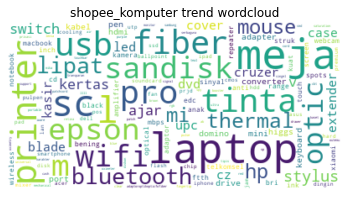

           Frequency
Key                 
laptop            12
meja              12
sc                 9
l                  9
printer            8
tinta              7
usb                7
fiber              7
pro                7
m                  6
wifi               6
epson              6
sandisk            6
mi                 5
lipat              5
optic              5
thermal            5
mouse              5
bluetooth          5
hp                 5
           Frequency
Key                 
laptop            12
meja              12
l                  9
sc                 9
printer            8
tinta              7
usb                7
fiber              7
pro                7
wifi               6
epson              6
m                  6
sandisk            6
mouse              5
mi                 5
hp                 5
thermal            5
stylus             5
bluetooth          5
optic              5


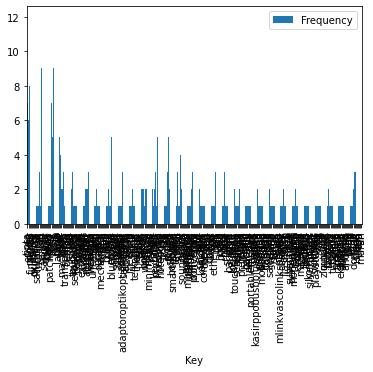

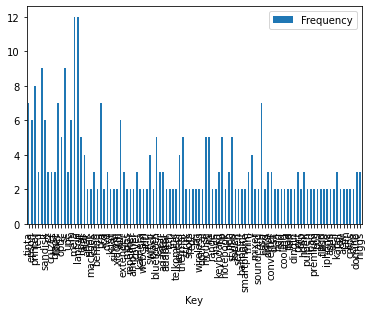

In [27]:
# seharusnya setiap judul itu dimasukkan ke kategori
watch_words=["oppo", "vivan", "yunteng", "mio"]
generate_trend("shopee_komputer.csv", min_freq=2, watch_words=watch_words)

Ukuran dataset: 60 baris dan 9 kolom

Start generating shopee_otomotif....
freq : 2
w not in exception : False , w:  masker , wcol_freq:  25
w not in exception : False , w:  ply , wcol_freq:  13
w not in exception : False , w:  earloop , wcol_freq:  4
w not in exception : False , w:  tali , wcol_freq:  1
w not in exception : False , w:  kuping , wcol_freq:  1
w not in exception : False , w:  medis , wcol_freq:  2
w not in exception : False , w:  kemenkes , wcol_freq:  4
w not in exception : False , w:  box , wcol_freq:  4
w not in exception : False , w:  orlee , wcol_freq:  4
w not in exception : False , w:  putih , wcol_freq:  4
w not in exception : False , w:  white , wcol_freq:  1
w not in exception : False , w:  cutting , wcol_freq:  1
w not in exception : False , w:  sticker , wcol_freq:  3
w not in exception : False , w:  design , wcol_freq:  1
w not in exception : False , w:  cuting , wcol_freq:  1
w not in exception : False , w:  stiker , wcol_freq:  2
w not in exception : Fals

file wordcloud:  img/shopee_otomotif_wordcloud.png


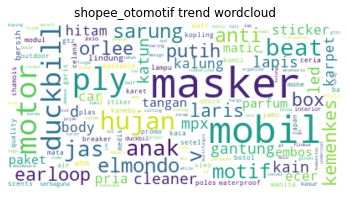

          Frequency
Key                
masker           25
mobil            20
ply              13
motor            12
duckbill          9
hujan             8
beat              7
jas               6
anak              6
v                 5
elmondo           5
anti              5
motif             5
sarung            5
cleaner           4
putih             4
earloop           4
gantung           4
led               4
laris             4
          Frequency
Key                
masker           25
mobil            20
ply              13
motor            12
duckbill          9
hujan             8
beat              7
anak              6
jas               6
motif             5
anti              5
v                 5
sarung            5
elmondo           5
orlee             4
box               4
earloop           4
mpx               4
lapis             4
katun             4


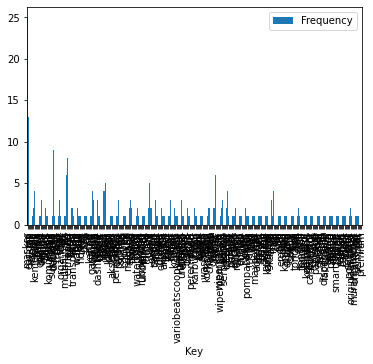

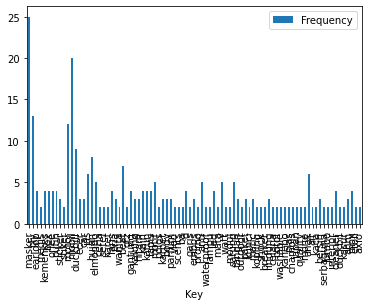

In [26]:
# seharusnya setiap judul itu dimasukkan ke kategori
watch_words=["oppo", "vivan", "yunteng", "mio"]
generate_trend("shopee_otomotif.csv", min_freq=2, watch_words=watch_words)

Ukuran dataset: 20 baris dan 7 kolom

Start generating tokped_otomotif....
freq : 2
w not in exception : False , w:  masker , wcol_freq:  14
w not in exception : False , w:  ply , wcol_freq:  15
w not in exception : False , w:  putih , wcol_freq:  2
w not in exception : False , w:  polos , wcol_freq:  1
w not in exception : False , w:  korea , wcol_freq:  1
w not in exception : False , w:  white , wcol_freq:  1
w not in exception : False , w:  earloop , wcol_freq:  7
w not in exception : False , w:  bedah , wcol_freq:  2
w not in exception : False , w:  bfe , wcol_freq:  1
w not in exception : False , w:  m , wcol_freq:  2
w not in exception : False , w:  smart , wcol_freq:  1
w not in exception : False , w:  sponge , wcol_freq:  1
w not in exception : False , w:  spon , wcol_freq:  1
w not in exception : False , w:  cuci , wcol_freq:  2
w not in exception : False , w:  mobil , wcol_freq:  3
w not in exception : False , w:  size , wcol_freq:  1
w not in exception : False , w:  scratch 

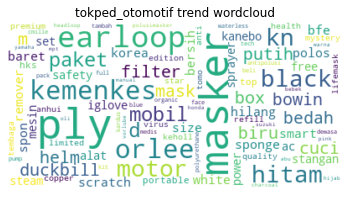

          Frequency
Key                
ply              15
masker           14
earloop           7
kemenkes          5
orlee             5
kn                4
motor             4
black             4
hitam             4
paket             3
mobil             3
d                 3
duckbill          2
mask              2
box               2
bowin             2
filter            2
helm              2
biru              2
m                 2
          Frequency
Key                
ply              15
masker           14
earloop           7
kemenkes          5
orlee             5
motor             4
kn                4
hitam             4
black             4
mobil             3
paket             3
d                 3
box               2
filter            2
bowin             2
duckbill          2
mask              2
helm              2
cuci              2
m                 2


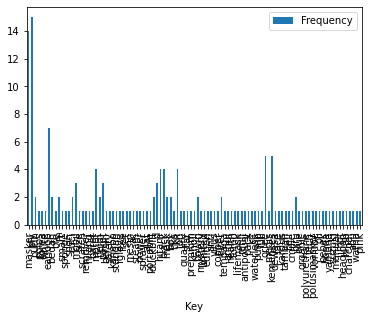

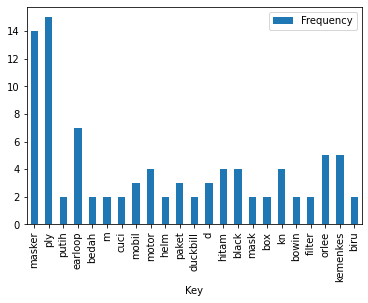

In [28]:
watch_words=["oppo", "vivan", "yunteng", "mio"]
generate_trend("tokped_otomotif.csv", min_freq=2, watch_words=watch_words) 

Ukuran dataset: 20 baris dan 7 kolom

Start generating tokped_elektronik....
freq : 2
w not in exception : False , w:  leka , wcol_freq:  2
w not in exception : False , w:  ap , wcol_freq:  2
w not in exception : False , w:  car , wcol_freq:  1
w not in exception : False , w:  air , wcol_freq:  3
w not in exception : False , w:  purifier , wcol_freq:  3
w not in exception : False , w:  mini , wcol_freq:  3
w not in exception : False , w:  portable , wcol_freq:  2
w not in exception : False , w:  hepa , wcol_freq:  3
w not in exception : False , w:  filter , wcol_freq:  3
w not in exception : False , w:  uvc , wcol_freq:  1
w not in exception : False , w:  ion , wcol_freq:  2
w not in exception : False , w:  uv , wcol_freq:  1
w not in exception : False , w:  jete , wcol_freq:  2
w not in exception : False , w:  headset , wcol_freq:  5
w not in exception : False , w:  ha , wcol_freq:  1
w not in exception : False , w:  handsfree , wcol_freq:  2
w not in exception : False , w:  audio , w

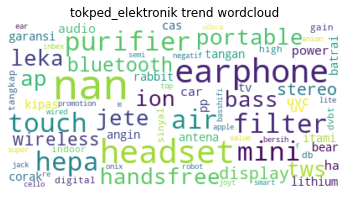

           Frequency
Key                 
nan                9
headset            5
earphone           5
air                3
purifier           3
mini               3
hepa               3
filter             3
touch              3
handsfree          2
stereo             2
display            2
bass               2
ap                 2
leka               2
wireless           2
jete               2
bluetooth          2
ion                2
portable           2
           Frequency
Key                 
nan                9
headset            5
earphone           5
air                3
purifier           3
mini               3
hepa               3
filter             3
touch              3
display            2
wireless           2
bluetooth          2
tws                2
leka               2
bass               2
handsfree          2
ap                 2
jete               2
ion                2
portable           2


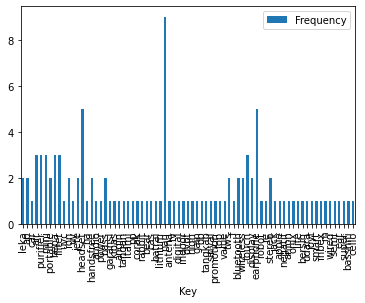

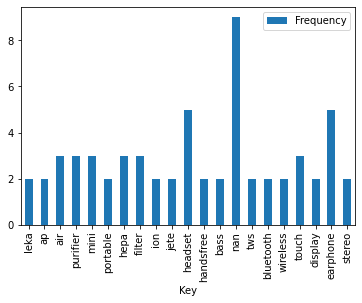

In [29]:
watch_words=["oppo", "vivan", "yunteng", "mio"]
generate_trend("tokped_elektronik.csv", min_freq=2, watch_words=watch_words)

Ukuran dataset: 20 baris dan 7 kolom

Start generating tokped_gadget....
freq : 2
w not in exception : False , w:  tripod , wcol_freq:  2
w not in exception : False , w:  liger , wcol_freq:  1
w not in exception : False , w:  l , wcol_freq:  1
w not in exception : False , w:  black , wcol_freq:  1
w not in exception : False , w:  edition , wcol_freq:  1
w not in exception : False , w:  sarung , wcol_freq:  2
w not in exception : False , w:  holder , wcol_freq:  10
w not in exception : False , w:  u , wcol_freq:  1
w not in exception : False , w:  xiaomi , wcol_freq:  1
w not in exception : False , w:  redmi , wcol_freq:  1
w not in exception : False , w:  note , wcol_freq:  1
w not in exception : False , w:  internal , wcol_freq:  1
w not in exception : False , w:  garansi , wcol_freq:  2
w not in exception : False , w:  resmi , wcol_freq:  2
w not in exception : False , w:  charger , wcol_freq:  5
w not in exception : False , w:  jete , wcol_freq:  3
w not in exception : False , w:  a

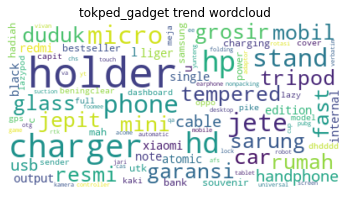

          Frequency
Key                
holder           10
charger           5
hp                4
hd                4
stand             3
phone             3
micro             3
jete              3
tempered          2
glass             2
mini              2
car               2
jepit             2
rumah             2
fast              2
duduk             2
tripod            2
grosir            2
mobil             2
cable             2
           Frequency
Key                 
holder            10
charger            5
hd                 4
hp                 4
stand              3
micro              3
jete               3
phone              3
cable              2
handphone          2
mini               2
mobil              2
car                2
jepit              2
tripod             2
duduk              2
sarung             2
grosir             2
glass              2
tempered           2


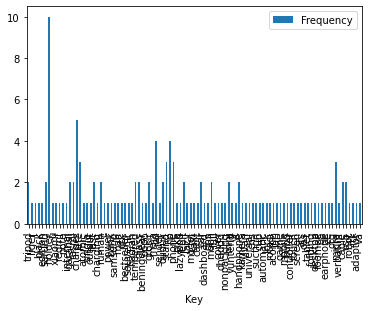

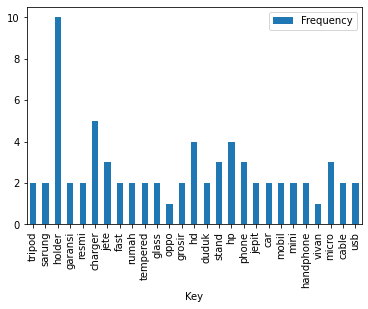

In [30]:
watch_words=["oppo", "vivan", "yunteng", "mio"]
generate_trend("tokped_gadget.csv", min_freq=2, watch_words=watch_words)

Ukuran dataset: 17 baris dan 7 kolom

Start generating tokped_komputer....
freq : 2
w not in exception : False , w:  sandisk , wcol_freq:  10
w not in exception : False , w:  ultra , wcol_freq:  9
w not in exception : False , w:  microsd , wcol_freq:  8
w not in exception : False , w:  microsdhc , wcol_freq:  1
w not in exception : False , w:  uhsi , wcol_freq:  5
w not in exception : False , w:  micro , wcol_freq:  6
w not in exception : False , w:  sd , wcol_freq:  6
w not in exception : False , w:  adapter , wcol_freq:  6
w not in exception : False , w:  otg , wcol_freq:  1
w not in exception : False , w:  usb , wcol_freq:  2
w not in exception : False , w:  typec , wcol_freq:  1
w not in exception : False , w:  dual , wcol_freq:  1
w not in exception : False , w:  drive , wcol_freq:  1
w not in exception : False , w:  go , wcol_freq:  1
w not in exception : False , w:  mbs , wcol_freq:  5
w not in exception : False , w:  microsdxc , wcol_freq:  4
w not in exception : False , w:  ss

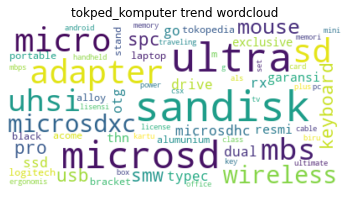

           Frequency
Key                 
sandisk           10
ultra              9
microsd            8
micro              6
sd                 6
adapter            6
mbs                5
uhsi               5
wireless           4
microsdxc          4
mouse              3
spc                2
pro                2
keyboard           2
smw                2
usb                2
memory             1
memori             1
license            1
power              1
           Frequency
Key                 
sandisk           10
ultra              9
microsd            8
micro              6
sd                 6
adapter            6
uhsi               5
mbs                5
microsdxc          4
wireless           4
mouse              3
usb                2
spc                2
smw                2
pro                2
keyboard           2


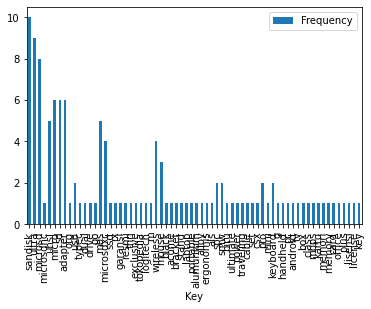

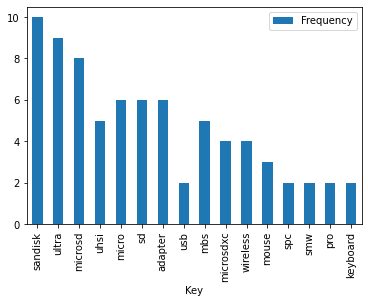

In [31]:
watch_words=["oppo", "vivan", "yunteng", "mio"]
generate_trend("tokped_komputer.csv", min_freq=2, watch_words=watch_words)

Ukuran dataset: 18 baris dan 7 kolom

Start generating tokped_atk....
freq : 2
w not in exception : False , w:  roll , wcol_freq:  5
w not in exception : False , w:  kertas , wcol_freq:  8
w not in exception : False , w:  kasir , wcol_freq:  3
w not in exception : False , w:  thermal , wcol_freq:  5
w not in exception : False , w:  paper , wcol_freq:  6
w not in exception : False , w:  ball , wcol_freq:  2
w not in exception : False , w:  pen , wcol_freq:  2
w not in exception : False , w:  pulpen , wcol_freq:  5
w not in exception : False , w:  pena , wcol_freq:  2
w not in exception : False , w:  joyko , wcol_freq:  2
w not in exception : False , w:  bp , wcol_freq:  2
w not in exception : False , w:  maze , wcol_freq:  1
w not in exception : False , w:  one , wcol_freq:  1
w not in exception : False , w:  struk , wcol_freq:  3
w not in exception : False , w:  xmm , wcol_freq:  1
w not in exception : False , w:  pos , wcol_freq:  1
w not in exception : False , w:  receipt , wcol_freq

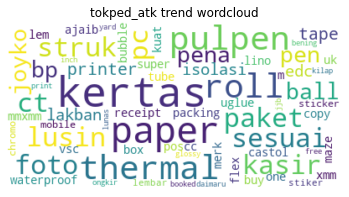

         Frequency
Key               
kertas           8
paper            6
roll             5
thermal          5
pulpen           5
struk            3
foto             3
ct               3
pc               3
lusin            3
paket            3
sesuai           3
kasir            3
isolasi          2
edc              2
bp               2
pen              2
ball             2
lakban           2
pena             2
         Frequency
Key               
kertas           8
paper            6
roll             5
thermal          5
pulpen           5
foto             3
sesuai           3
ct               3
pc               3
lusin            3
paket            3
struk            3
kasir            3
printer          2
tape             2
isolasi          2
lakban           2
bp               2
joyko            2
pena             2


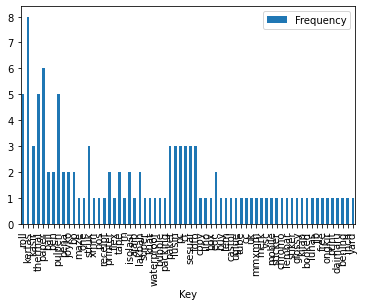

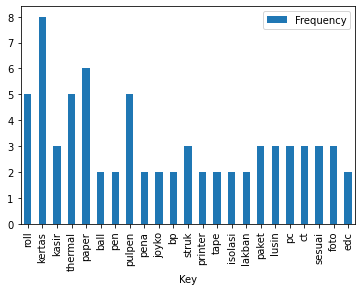

In [32]:
watch_words=["oppo", "vivan", "yunteng", "mio"]
generate_trend("tokped_atk.csv", min_freq=2, watch_words=watch_words)

Ukuran dataset: 20 baris dan 7 kolom

Start generating tokped_sembako....
freq : 2
w not in exception : False , w:  paket , wcol_freq:  6
w not in exception : False , w:  hemat , wcol_freq:  1
w not in exception : False , w:  minggu , wcol_freq:  1
w not in exception : False , w:  raftels , wcol_freq:  2
w not in exception : False , w:  fish , wcol_freq:  2
w not in exception : False , w:  skin , wcol_freq:  2
w not in exception : False , w:  spicy , wcol_freq:  1
w not in exception : False , w:  snack , wcol_freq:  2
w not in exception : False , w:  keripik , wcol_freq:  2
w not in exception : False , w:  kulit , wcol_freq:  2
w not in exception : False , w:  ikan , wcol_freq:  2
w not in exception : False , w:  movie , wcol_freq:  1
w not in exception : False , w:  fun , wcol_freq:  1
w not in exception : False , w:  bob , wcol_freq:  1
w not in exception : False , w:  fm , wcol_freq:  1
w not in exception : False , w:  tbc , wcol_freq:  1
w not in exception : False , w:  jolly , wco

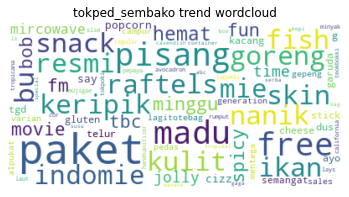

           Frequency
Key                 
paket              6
madu               3
pisang             3
free               3
ikan               2
goreng             2
resmi              2
indomie            2
nanik              2
mie                2
bu                 2
kulit              2
raftels            2
keripik            2
fish               2
snack              2
skin               2
topokki            1
mentega            1
teokbokki          1
         Frequency
Key               
paket            6
pisang           3
madu             3
free             3
snack            2
keripik          2
kulit            2
ikan             2
raftels          2
skin             2
goreng           2
fish             2
bu               2
nanik            2
resmi            2
indomie          2
mie              2


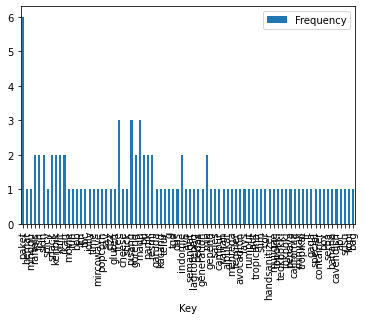

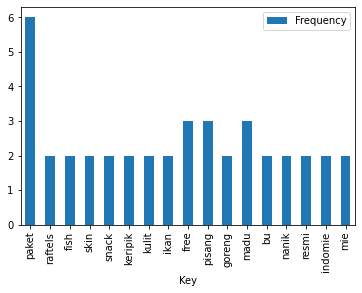

In [33]:
watch_words=["oppo", "vivan", "yunteng", "mio"]
generate_trend("tokped_sembako.csv", min_freq=2, watch_words=watch_words)

Ukuran dataset: 20 baris dan 7 kolom

Start generating tokped_gadget....
freq : 2
w not in exception : False , w:  tripod , wcol_freq:  2
w not in exception : False , w:  liger , wcol_freq:  1
w not in exception : False , w:  l , wcol_freq:  1
w not in exception : False , w:  black , wcol_freq:  1
w not in exception : False , w:  edition , wcol_freq:  1
w not in exception : False , w:  sarung , wcol_freq:  2
w not in exception : False , w:  holder , wcol_freq:  10
w not in exception : False , w:  u , wcol_freq:  1
w not in exception : False , w:  xiaomi , wcol_freq:  1
w not in exception : False , w:  redmi , wcol_freq:  1
w not in exception : False , w:  note , wcol_freq:  1
w not in exception : False , w:  internal , wcol_freq:  1
w not in exception : False , w:  garansi , wcol_freq:  2
w not in exception : False , w:  resmi , wcol_freq:  2
w not in exception : False , w:  charger , wcol_freq:  5
w not in exception : False , w:  jete , wcol_freq:  3
w not in exception : False , w:  a

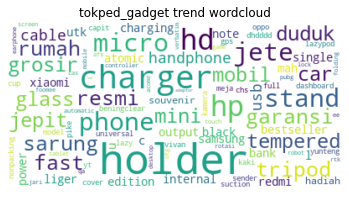

          Frequency
Key                
holder           10
charger           5
hp                4
hd                4
stand             3
phone             3
micro             3
jete              3
tempered          2
glass             2
mini              2
car               2
jepit             2
rumah             2
fast              2
duduk             2
tripod            2
grosir            2
mobil             2
cable             2
           Frequency
Key                 
holder            10
charger            5
hd                 4
hp                 4
stand              3
micro              3
jete               3
phone              3
cable              2
handphone          2
mini               2
mobil              2
car                2
jepit              2
tripod             2
duduk              2
sarung             2
grosir             2
glass              2
tempered           2


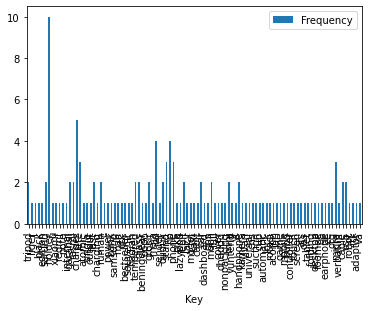

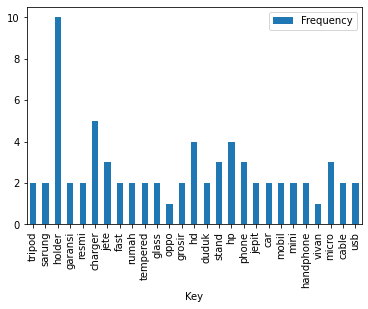

In [34]:
watch_words=["oppo", "vivan", "yunteng", "mio"]
generate_trend("tokped_gadget.csv", min_freq=2, watch_words=watch_words)